Challenge Set 1

Topic: Explore MTA turnstile data

Date: 1/13/2016

Name: Justin Stewart

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('2013_movies.csv')

# Challenge 1

Plot domestic total gross over time.

/Users/justinstewart/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


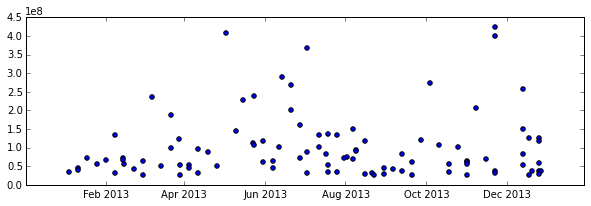

In [4]:
%matplotlib inline
plt.figure(figsize=(10,3))
dates = [date.date() for date in pd.to_datetime(df.ReleaseDate)]
plt.scatter(dates,df.DomesticTotalGross)


# Challenge 2

Plot runtime vs. domestic total gross.

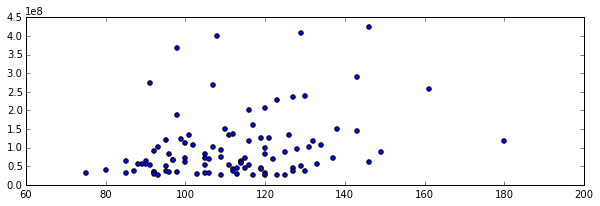

In [85]:
%matplotlib inline
plt.figure(figsize=(10,3))
plt.scatter(df.Runtime,df.DomesticTotalGross)

# Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [91]:
grouped =  df.groupby(['Rating'])
print grouped.DomesticTotalGross.mean()

Rating
G        268492764
PG       131135716
PG-13    111449769
R         69892429
Name: DomesticTotalGross, dtype: int64


# Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

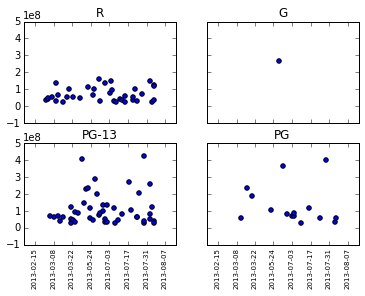

In [92]:
ratings = grouped.groups.keys()

%matplotlib inline
plt.figure(figsize=(10,3))
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)

data = grouped.get_group(ratings[0]).sort_values('ReleaseDate')
date_strings = data.ReleaseDate
domestic = data.DomesticTotalGross
dates = [date.date() for date in pd.to_datetime(date_strings)]
ax1.scatter(dates,domestic)
ax1.set_xticklabels(dates, rotation='vertical', fontsize=7)
ax1.set_title(ratings[0])

data = grouped.get_group(ratings[2]).sort_values('ReleaseDate')
date_strings = data.ReleaseDate
domestic = data.DomesticTotalGross
dates = [date.date() for date in pd.to_datetime(date_strings)]
ax2.scatter(dates,domestic)
ax2.set_xticklabels(dates, rotation='vertical', fontsize=7)
ax2.set_title(ratings[2])

data = grouped.get_group(ratings[1]).sort_values('ReleaseDate')
date_strings = data.ReleaseDate
domestic = data.DomesticTotalGross
dates = [date.date() for date in pd.to_datetime(date_strings)]
ax3.scatter(dates,domestic)
ax3.set_xticklabels(dates, rotation='vertical', fontsize=7)
ax3.set_title(ratings[1])

data = grouped.get_group(ratings[3]).sort_values('ReleaseDate')
date_strings = data.ReleaseDate
domestic = data.DomesticTotalGross
dates = [date.date() for date in pd.to_datetime(date_strings)]
ax4.scatter(dates,domestic)
ax4.set_xticklabels(dates, rotation='vertical', fontsize=7)
ax4.set_title(ratings[3])

# Challenge 5

What director in your dataset has the highest gross per movie?

In [19]:
df.groupby(['Director']).mean().DomesticTotalGross.argmax()

'Francis Lawrence'

# Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [42]:
df['ReleaseMonth'] = [d.month for d in pd.to_datetime(df.ReleaseDate)]

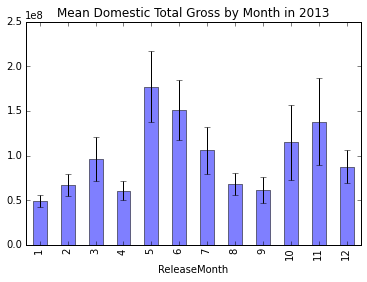

In [93]:
movie_month_stats = df.groupby(['ReleaseMonth']).mean()
dtg_std = df.groupby(['ReleaseMonth']).std().DomesticTotalGross
dtg_n = df.groupby(['ReleaseMonth']).count().DomesticTotalGross
dtg_stderr = [s/n**.5 for s,n in zip(dtg_std,dtg_n)]
movie_month_stats['StdErr'] = dtg_stderr
movie_month_stats['DomesticTotalGross'].plot(kind = 'bar', 
                                             alpha=0.5, 
                                             yerr = movie_month_stats['StdErr'])\
                                        .set_title('Mean Domestic Total Gross by Month in 2013')
